In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

d:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
def process_avg_acceleration(df):
    i = 0
    avg_x_full = []
    avg_y_full = []
    avg_z_full = []
    label = []
    while i < len(df[0]):
        max_window = df[0][i] + 2000
        min_window = df[0][i]
        if i != 0:                                                                 #handling overlap
            min_window -= 1000
            max_window -= 1000
            i -= int(count/2)
        avg_x = [df[1][i]]
        avg_y = [df[2][i]]
        avg_z = [df[3][i]]
        count = 0
        while min_window < max_window:
            i += 1
            count += 1
            try:
                avg_x.append(df[1][i])
                avg_y.append(df[2][i])
                avg_z.append(df[3][i])
                min_window = df[0][i]
            except KeyError:
                break
        avg_x_full.append(sum(avg_x)/len(avg_x))
        avg_y_full.append(sum(avg_y)/len(avg_y))
        avg_z_full.append(sum(avg_z)/len(avg_z))
        label.append(df[5][1])
        
    return pd.DataFrame({'avg_acc_x' : avg_x_full, 'avg_acc_y' : avg_y_full, 'avg_acc_z' : avg_z_full})

In [7]:
def process_avg_gyroscope(df):
    i = 0
    avg_x_full = []
    avg_y_full = []
    avg_z_full = []
    label = []
    while i < len(df[0]):
        max_window = df[0][i] + 2000
        min_window = df[0][i]
        if i != 0:                                                                 #handling overlap
            min_window -= 1000
            max_window -= 1000
            i -= int(count/2)
        avg_x = [df[1][i]]
        avg_y = [df[2][i]]
        avg_z = [df[3][i]]
        count = 0
        while min_window < max_window:
            i += 1
            count += 1
            try:
                avg_x.append(df[1][i])
                avg_y.append(df[2][i])
                avg_z.append(df[3][i])
                min_window = df[0][i]
            except KeyError:
                break
        avg_x_full.append(sum(avg_x)/len(avg_x))
        avg_y_full.append(sum(avg_y)/len(avg_y))
        avg_z_full.append(sum(avg_z)/len(avg_z))
        label.append(df[5][1])
        
    return pd.DataFrame({'avg_gyroscope_x' : avg_x_full, 'avg_gyroscope_y' : avg_y_full, 'avg_gyroscope_z' : avg_z_full, 'label' : label})

In [8]:
last_dirs = ["1_android.sensor.accelerometer.data.csv.gz","4_android.sensor.gyroscope.data.csv.gz"]
path = "Sessions_new/"
dirs = []
dir_list = [x[0] for x in os.walk(path)]
for each_dir in dir_list[2:]:

    if "data" in each_dir:
    #each_file = os.listdir(each_dir)
        dirs.append(each_dir)
        


dirs.sort(key=lambda x:x[-22:])
gy_shapes = []
print(dirs[0])
#avg_acc_gy = pd.DataFrame(columns = ["avg_acc_x","avg_acc_y","avg_acc_x", "avg_gyroscope_x",  "avg_gyroscope_y",  "avg_gyroscope_z",  "label"])
for i in dirs[0:1]:
    #print(i)
    full_path_acc = os.path.normpath(i + "/" + "1_android.sensor.accelerometer.data.csv.gz")
    full_path_gy = os.path.normpath(i + "/" + "4_android.sensor.gyroscope.data.csv.gz")
    print("processing : " + full_path_acc)
    df_ac = pd.read_csv(full_path_acc, compression='gzip', sep=',', header=None)
    df_gy = pd.read_csv(full_path_gy, compression='gzip', sep=',', header=None)
    new_df_ac = process_avg_acceleration(df_ac)
    new_df_gy = process_avg_gyroscope(df_gy)
    #print(new_df_ac.head())
    #print(new_df_gy.head())
    if new_df_gy.shape[0] < new_df_ac.shape[0]:
        new_df_ac = new_df_ac[:new_df_gy.shape[0]]
    new_df = pd.concat([new_df_ac,new_df_gy], axis = 1)
    #print(new_df.head())   
    #print(new_df.shape)
    #print(avg_acc_gy.shape)
    #gy_shapes.append(new_df.shape)
    avg_acc_gy = new_df

for i in dirs[1:]:
    print(i)
    full_path_acc = os.path.normpath(i + "/" + "1_android.sensor.accelerometer.data.csv.gz")
    full_path_gy = os.path.normpath(i + "/" + "4_android.sensor.gyroscope.data.csv.gz")
    if full_path_acc == "Sessions2\Sessions2\14442D57F7E1B88_Mon_Feb_12_18-26_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz":
        continue
    print("processing : " + full_path_acc)
    df_ac = pd.read_csv(full_path_acc, compression='gzip', sep=',', header=None)
    print("processing : " + full_path_gy)
    df_gy = pd.read_csv(full_path_gy, compression='gzip', sep=',', header=None)
    new_df_ac = process_avg_acceleration(df_ac)
    new_df_gy = process_avg_gyroscope(df_gy)
    #print(new_df_ac.head())
    #print(new_df_gy.head())
    if new_df_gy.shape[0] < new_df_ac.shape[0]:
        new_df_ac = new_df_ac[:new_df_gy.shape[0]]
    new_df = pd.concat([new_df_ac,new_df_gy], axis = 1)
    #print(new_df.head())   
    #print(new_df.shape)
    #print(avg_acc_gy.shape)
    #gy_shapes.append(new_df.shape)
    avg_acc_gy = pd.concat([avg_acc_gy,new_df])


print(avg_acc_gy.shape)

Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-16_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-16_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-18_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-18_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-18_2018_PST\data\4_android.sensor.gyroscope.data.csv.gz
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-25_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-25_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-25_2018_PST\data\4_android.sensor.gyroscope.data.csv.gz
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-31_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-31_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-31_2018_PST\data

In [9]:
print(avg_acc_gy.shape)

(18845, 7)


In [32]:
avg_a

,avg_acc_x,avg_acc_y,avg_acc_z,avg_gyroscope_x,avg_gyroscope_y,avg_gyroscope_z,label
24,-9.153679,-1.709103,1.236891,-0.396067,-0.135603,0.105942,walking
25,-9.100262,-2.038733,1.595674,-0.068369,-0.124800,-0.056715,walking
26,-9.485829,-2.058920,1.795308,0.424886,-0.076625,-0.167118,walking


In [10]:
avg_acc_gy = avg_acc_gy.iloc[np.random.permutation(len(avg_acc_gy))]

In [11]:
avg_acc_gy.head()

,avg_acc_x,avg_acc_y,avg_acc_z,avg_gyroscope_x,avg_gyroscope_y,avg_gyroscope_z,label
48,1.156489,0.511083,-10.034534,1.078438,-0.371504,0.611643,standing
1594,1.664664,9.298207,1.020589,-0.000462,-0.000491,-0.000688,laying_down
329,3.689736,-1.186898,8.932744,0.011319,-0.025443,0.097105,standing
811,-3.055121,8.240125,2.879088,-0.001358,0.000228,-0.000167,laying_down
938,1.088497,9.488764,-0.652135,0.022427,-0.000187,-0.016226,laying_down


In [12]:
data = avg_acc_gy[["avg_acc_x","avg_acc_y","avg_acc_z","avg_gyroscope_x","avg_gyroscope_y","avg_gyroscope_z"]].as_matrix()
print(data[:5])
targets = avg_acc_gy[["label"]].as_matrix()

[[ 1.15648939e+00  5.11083103e-01 -1.00345343e+01  1.07843789e+00
  -3.71504200e-01  6.11642989e-01]
 [ 1.66466443e+00  9.29820698e+00  1.02058889e+00 -4.61913359e-04
  -4.91397154e-04 -6.87956011e-04]
 [ 3.68973606e+00 -1.18689781e+00  8.93274398e+00  1.13193334e-02
  -2.54432786e-02  9.71054876e-02]
 [-3.05512066e+00  8.24012528e+00  2.87908769e+00 -1.35845382e-03
   2.27524280e-04 -1.67297275e-04]
 [ 1.08849704e+00  9.48876357e+00 -6.52135015e-01  2.24273660e-02
  -1.86730990e-04 -1.62259338e-02]]


In [13]:
cache = {'laying_down' : 0, 'sitting' : 1, 'walking' : 2, 'standing' : 3}
targets.reshape(len(targets))

array(['standing', 'laying_down', 'standing', ..., 'laying_down',
       'sitting', 'standing'], dtype=object)

In [14]:
print(targets.shape)
bin_targets = []
for i in targets:
    #print(i)
    bin_targets.append(cache[i[0]])

(18845, 1)


In [15]:
bin_targets[:5]

[3, 0, 3, 0, 0]

In [16]:
clf = DecisionTreeClassifier(random_state=0)

In [17]:
cross_val_score(clf, data, bin_targets, cv=10)

array([0.89978791, 0.89549072, 0.89602122, 0.89018568, 0.89230769,
       0.90875332, 0.89437367, 0.89968153, 0.88794477, 0.89484865])

In [18]:
data_acc = avg_acc_gy[["avg_acc_x","avg_acc_y","avg_acc_z"]].as_matrix()
print(data[:5])
targets = avg_acc_gy[["label"]].as_matrix()
cross_val_score(clf, data_acc, bin_targets, cv=10)

[[ 1.15648939e+00  5.11083103e-01 -1.00345343e+01  1.07843789e+00
  -3.71504200e-01  6.11642989e-01]
 [ 1.66466443e+00  9.29820698e+00  1.02058889e+00 -4.61913359e-04
  -4.91397154e-04 -6.87956011e-04]
 [ 3.68973606e+00 -1.18689781e+00  8.93274398e+00  1.13193334e-02
  -2.54432786e-02  9.71054876e-02]
 [-3.05512066e+00  8.24012528e+00  2.87908769e+00 -1.35845382e-03
   2.27524280e-04 -1.67297275e-04]
 [ 1.08849704e+00  9.48876357e+00 -6.52135015e-01  2.24273660e-02
  -1.86730990e-04 -1.62259338e-02]]


array([0.9088017 , 0.89496021, 0.89496021, 0.90450928, 0.91564987,
       0.9066313 , 0.90552017, 0.89968153, 0.90015932, 0.91343601])

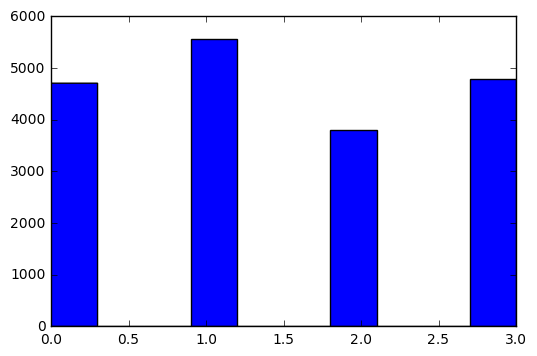

In [19]:
plt.hist(bin_targets)
plt.show()

In [20]:
clf = LogisticRegression()

In [21]:
cross_val_score(clf, data_acc, bin_targets, cv=10)

array([0.74496288, 0.72519894, 0.72201592, 0.73050398, 0.73474801,
       0.74058355, 0.72558386, 0.73036093, 0.73021774, 0.71853425])

In [79]:
print(data[0:5])

[[ 1.20301083e+00  9.35390331e+00 -2.13122411e+00 -1.30294485e-03
  -9.58047676e-05 -8.33501487e-04]
 [-7.76177700e+00 -5.42556269e+00 -6.69809507e-01  7.78985905e-02
   1.19696681e-01  9.50048624e-03]
 [ 7.50540219e+00 -3.20755435e+00  4.61325302e+00 -1.66707500e-03
  -1.59013207e-01  5.79530118e-02]
 [ 1.19015239e+00  9.37106758e+00 -2.03177351e+00 -7.14802205e-04
   1.47058825e-12 -2.83962510e-04]
 [-3.84957035e+00 -5.09591333e+00  6.89115424e+00  3.10164919e-04
   1.48339743e-04 -6.74271139e-06]]


In [81]:
print(bin_targets[0:5])

[0, 3, 3, 0, 1]
